In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cities = pd.read_csv('/content/drive/MyDrive/Data/data/cities.csv')
providers = pd.read_csv('/content/drive/MyDrive/Data/data/providers.csv')
stations = pd.read_csv('/content/drive/MyDrive/Data/data/stations.csv')
ticket_data = pd.read_csv('/content/drive/MyDrive/Data/data/ticket_data.csv')

# Prix min, moyen et max par trajet


In [ ]:
ticket_data.shape

(74168, 12)

In [ ]:
ticket_data.head(3)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542


In [ ]:
ticket_data.isna().sum()

id                     0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
dtype: int64

In [ ]:
# ticket_data.dropna(inplace=True)
# ticket_data.reset_index(drop=True, inplace=True)

In [ ]:
# ticket_data.o_station = ticket_data.o_station.astype(int, copy=False)
# ticket_data.d_station = ticket_data.d_station.astype(int, copy=False)

In [ ]:
ticket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


In [ ]:
ticket_data.groupby(['o_city', 'd_city'])['price_in_cents'].min()

o_city  d_city
5       23        18600
6       227        9860
        504        2000
        628        2600
        845         700
                  ...  
11938   126        3000
12124   1064       6000
12166   857        5300
12190   639         600
        8937       9800
Name: price_in_cents, Length: 1437, dtype: int64

In [ ]:
ticket_data.groupby(['o_city', 'd_city'])['price_in_cents'].max()

o_city  d_city
5       23        22000
6       227       13650
        504        8920
        628        3190
        845        2420
                  ...  
11938   126        5350
12124   1064       7900
12166   857        5300
12190   639         850
        8937       9800
Name: price_in_cents, Length: 1437, dtype: int64

In [ ]:
ticket_data.groupby(['o_city', 'd_city'])['price_in_cents'].mean()

o_city  d_city
5       23        20320.000000
6       227       11755.000000
        504        4042.666667
        628        2797.500000
        845         864.626866
                      ...     
11938   126        4204.861111
12124   1064       6950.000000
12166   857        5300.000000
12190   639         688.888889
        8937       9800.000000
Name: price_in_cents, Length: 1437, dtype: float64

# Durée min/max/moyenne par trajet

In [ ]:
ticket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


In [ ]:
# transformer le type de departure_ts et arrival_ts a datetime
ticket_data['departure_ts'] = pd.to_datetime(ticket_data['departure_ts'])
ticket_data['arrival_ts'] = pd.to_datetime(ticket_data['arrival_ts'])

In [ ]:
# calculer la duree de chaque 
ticket_data["duree"] = ticket_data.arrival_ts - ticket_data.departure_ts 

In [ ]:
ticket_data.sample(3)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree
17786,6812810,8371,10642.0,304.0,2017-10-18 14:00:00+00:00,2017-10-18 21:15:00+00:00,1300,2017-10-06 08:37:37.863+00,"{1105,1105}",{9},628,562,0 days 07:15:00
55518,6850543,8376,334.0,6797.0,2017-10-17 18:14:00+00:00,2017-10-17 22:23:00+00:00,3300,2017-10-15 14:08:35.689+00,"{3680,3680}",{8376},504,628,0 days 04:09:00
56700,6851724,13,279.0,417.0,2017-11-17 08:30:00+00:00,2017-11-18 00:40:00+00:00,5490,2017-10-15 17:18:14.269+00,"{482,482}",{13},628,122,0 days 16:10:00


In [ ]:
# Durée min par trajet
ticket_data.groupby(['o_city', 'd_city'])['duree'].min()

o_city  d_city
5       23       0 days 08:53:00
6       227      0 days 12:24:00
        504      0 days 05:36:00
        628      0 days 09:40:00
        845      0 days 01:00:00
                       ...      
11938   126      0 days 05:30:00
12124   1064     0 days 11:10:00
12166   857      0 days 21:55:00
12190   639      0 days 01:10:00
        8937     0 days 09:10:00
Name: duree, Length: 1437, dtype: timedelta64[ns]

In [ ]:
# Durée max par trajet
ticket_data.groupby(['o_city', 'd_city'])['duree'].max()

o_city  d_city
5       23       0 days 15:54:00
6       227      0 days 15:01:00
        504      0 days 12:20:00
        628      0 days 14:30:00
        845      0 days 04:11:00
                       ...      
11938   126      1 days 11:20:00
12124   1064     0 days 23:10:00
12166   857      0 days 21:55:00
12190   639      0 days 02:40:00
        8937     0 days 09:10:00
Name: duree, Length: 1437, dtype: timedelta64[ns]

In [ ]:
# Durée moyenne par trajet
ticket_data.groupby(['o_city', 'd_city'])['duree'].apply(np.mean).reset_index()

,o_city,d_city,duree
0,5,23,0 days 10:18:48
1,6,227,0 days 13:42:30
2,6,504,0 days 08:17:24
3,6,628,0 days 12:10:00
4,6,845,0 days 01:19:54.626865671
...,...,...,...
1432,11938,126,0 days 07:25:16.666666666
1433,12124,1064,0 days 17:10:00
1434,12166,857,0 days 21:55:00
1435,12190,639,0 days 01:28:53.333333333


# différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km) 

In [ ]:
ticket_data.sample(2)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree,distance,distance_category,transport_type
35726,6830751,8385,NaN,NaN,2017-10-15 16:00:00+00:00,2017-10-15 19:40:00+00:00,2650,2017-10-10 08:03:25.414+00,NaN,NaN,562,126,0 days 03:40:00,278.279191,201-800km,carpooling
2058,6797083,13,60.0,861.0,2017-10-19 17:20:00+00:00,2017-10-20 15:35:00+00:00,2300,2017-10-01 20:30:12.222+00,"{860,860}",{9},30,542,0 days 22:15:00,376.253549,201-800km,bus


In [ ]:
cities.sample(2)

,id,local_name,unique_name,latitude,longitude,population
3204,8849,"Singen Hohentwiel, Baden-Württemberg, Deutschland",singen-hohentwiel,47.75907,8.83993,NaN
2199,8201,"Pradelles, Auvergne-Rhône-Alpes, France",pradelles,44.76960,3.88199,NaN


### Calculer la distance

In [ ]:
import geopy.distance

# this function get two stations and return the distance between them
def calculate_distance(city1, city2):

  lat1 = cities[cities.id == city1].latitude.item()
  lat2 = cities[cities.id == city2].latitude.item()
  long1 = cities[cities.id == city1].longitude.item()
  long2 = cities[cities.id == city2].longitude.item()

  coords_1 = (lat1, long1)
  coords_2 = (lat2, long2)

  return geopy.distance.vincenty(coords_1, coords_2).km

In [ ]:
from tqdm import tqdm

col = [calculate_distance(row[0], row[1]) for row in tqdm(ticket_data[['o_city', 'd_city']].to_numpy()) ]

100%|██████████| 74168/74168 [04:03<00:00, 304.67it/s]


In [ ]:
ticket_data["distance"] = col

In [ ]:
ticket_data.sample(3)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree,distance
12514,6807539,8385,NaN,NaN,2017-10-08 09:10:00+00:00,2017-10-08 12:20:00+00:00,2300,2017-10-04 20:08:28.545+00,NaN,NaN,845,109,0 days 03:10:00,243.729633
60981,6855993,8385,NaN,NaN,2017-10-19 16:10:00+00:00,2017-10-19 20:10:00+00:00,2650,2017-10-16 19:03:56.119+00,NaN,NaN,562,628,0 days 04:00:00,339.046766
63647,6858672,8380,860.0,436.0,2017-10-18 22:35:00+00:00,2017-10-19 08:09:00+00:00,2750,2017-10-17 15:13:16.973+00,"{4122,4122}",{8380},126,213,0 days 09:34:00,129.407191


### Calculer la category

In [ ]:
ticket_data.loc[ ticket_data.distance < 200, 'distance_category'] = "0-200km"

ticket_data.loc[ (ticket_data.distance > 200) & (ticket_data.distance < 800), 'distance_category'] = "201-800km"

ticket_data.loc[ (ticket_data.distance > 800) & (ticket_data.distance < 2000), 'distance_category'] = "800-2000km"

ticket_data.loc[ ticket_data.distance > 2000, 'distance_category'] = "2000+km"

In [ ]:
ticket_data

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree,distance,distance_category
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,0 days 06:10:00,503.136831,201-800km
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00,503.136831,201-800km
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,503.136831,201-800km
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,503.136831,201-800km
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00,503.136831,201-800km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,0 days 13:30:00,339.046766,201-800km
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:30:00,339.046766,201-800km
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:45:00,339.046766,201-800km
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,0 days 07:45:00,339.046766,201-800km


### Definir le type de transport pour chaque ticket

In [ ]:
providers

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


In [ ]:
providers[ providers.id == 9].transport_type.value_counts()

bus    1
Name: transport_type, dtype: int64

In [ ]:
col = [ providers[ providers.id == id].transport_type.item() for id in tqdm(ticket_data["company"])]

100%|██████████| 74168/74168 [00:48<00:00, 1535.75it/s]


In [ ]:
ticket_data['transport_type'] = col

In [ ]:
ticket_data

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree,distance,distance_category,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,0 days 06:10:00,503.136831,201-800km,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00,503.136831,201-800km,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,503.136831,201-800km,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,503.136831,201-800km,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00,503.136831,201-800km,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,0 days 13:30:00,339.046766,201-800km,bus
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:30:00,339.046766,201-800km,bus
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:45:00,339.046766,201-800km,bus
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,0 days 07:45:00,339.046766,201-800km,bus


### Results: Grouping

#### Price

In [ ]:
ticket_data.sample()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree,distance,distance_category,transport_type
41638,6836663,8376,6246.0,3633.0,2017-10-21 09:52:00+00:00,2017-10-21 14:36:00+00:00,9600,2017-10-11 14:08:27.272+00,"{396,396,248,248}","{8376,8384}",628,1,0 days 04:44:00,343.591165,201-800km,train


In [ ]:
ticket_data.groupby(['transport_type', 'distance_category' ])['price_in_cents'].mean()

transport_type  distance_category
bus             0-200km               2182.830918
                201-800km             3494.850022
                800-2000km            6949.950045
carpooling      0-200km               1177.352385
                201-800km             3218.064310
                800-2000km            8626.545455
train           0-200km               3487.900779
                201-800km             9124.779489
                800-2000km           15463.746130
Name: price_in_cents, dtype: float64

In [ ]:
my_serie = ticket_data.groupby(['transport_type', 'distance_category' ])['price_in_cents'].mean()

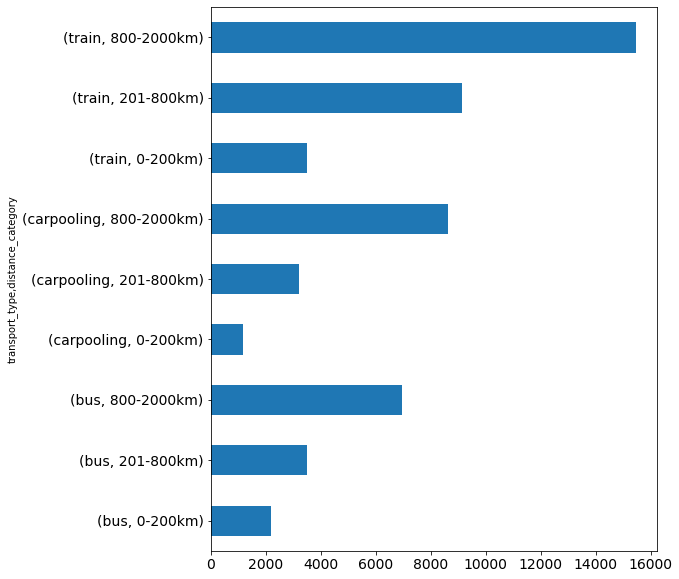

In [ ]:
my_serie.plot(kind='barh', figsize=(8, 10), fontsize=14)

#### Duree

In [ ]:
ticket_data.groupby(['transport_type', 'distance_category' ])['duree'].apply(np.mean)

transport_type  distance_category
bus             0-200km             0 days 10:13:57.053140096
                201-800km           0 days 15:04:29.269314709
                800-2000km          1 days 03:32:10.027247956
carpooling      0-200km             0 days 01:57:07.342427561
                201-800km           0 days 04:45:47.272436410
                800-2000km          0 days 13:06:00.839160839
train           0-200km             0 days 04:25:09.840098400
                201-800km           0 days 07:40:39.543514566
                800-2000km          0 days 12:09:31.021671826
Name: duree, dtype: timedelta64[ns]

# Prediction des prix

In [498]:
df = ticket_data.copy()

In [499]:
df.drop( labels=['o_station', 'd_station', 'departure_ts', 'arrival_ts', 'search_ts', 'middle_stations', 'other_companies', 'id', 'distance_category'], axis=1, inplace=True)

In [500]:
df['duree'] = df.duree.dt.total_seconds()

In [501]:
y = df['price_in_cents']

In [502]:
X = df.drop( 'price_in_cents' ,axis=1)

In [503]:
X = pd.get_dummies(data = X,  columns= ['transport_type'])
X

,company,o_city,d_city,duree,distance,transport_type_bus,transport_type_carpooling,transport_type_train
0,8385,611,542,22200.0,503.136831,0,1,0
1,9,611,542,64200.0,503.136831,1,0,0
2,8377,611,542,115020.0,503.136831,0,0,1
3,8377,611,542,77700.0,503.136831,0,0,1
4,8381,611,542,78360.0,503.136831,0,0,1
...,...,...,...,...,...,...,...,...
74163,13,628,562,48600.0,339.046766,1,0,0
74164,9,628,562,23400.0,339.046766,1,0,0
74165,8371,628,562,24300.0,339.046766,1,0,0
74166,13,628,562,27900.0,339.046766,1,0,0


In [508]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0)

reg = GradientBoostingRegressor(random_state=33, n_estimators=300, learning_rate=0.2, max_depth=8)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=33, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [509]:
reg.score(X_test, y_test)

0.9337494890751233